In [13]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# load json twitter data
data= pd.read_json('../data/lausanne_50K.json',typ='frame',lines=True)
data.head()

,_id,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,source,text,timestamp_ms,truncated,user
0,{'$oid': '55b932fd0a1776527f627ec2'},NaN,None,2015-07-29 20:09:32,NaN,"{'symbols': [], 'user_mentions': [], 'urls': [...",NaN,NaN,0,False,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Flemme de me préparer,2015-07-29 20:09:32.554,False,{'profile_image_url_https': 'https://pbs.twimg...
1,{'$oid': '55b9720c0a1776527f628c28'},NaN,None,2015-07-30 00:38:35,NaN,"{'symbols': [], 'user_mentions': [], 'urls': [...",NaN,NaN,0,False,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Trop hâte d'aller à Zurich,2015-07-30 00:38:35.304,False,{'profile_image_url_https': 'https://pbs.twimg...
2,{'$oid': '55b9730c0a1776527f628c3b'},NaN,None,2015-07-30 00:42:51,NaN,"{'symbols': [], 'user_mentions': [], 'urls': [...",NaN,NaN,0,False,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",mais accidentellement il ajouta a cette mixtur...,2015-07-30 00:42:51.603,False,{'profile_image_url_https': 'https://pbs.twimg...
3,{'$oid': '55bbca590a1776527f62dacc'},NaN,None,2015-07-31 19:19:53,NaN,"{'symbols': [], 'user_mentions': [{'indices': ...",NaN,NaN,0,False,...,NaN,NaN,NaN,0,False,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",@sansplomb99 lui a payé en effet 😁,2015-07-31 19:19:53.202,False,{'profile_image_url_https': 'https://pbs.twimg...
4,{'$oid': '55bc9c8e0a1776527f62ee4a'},NaN,None,2015-08-01 10:16:45,NaN,"{'symbols': [], 'user_mentions': [], 'urls': [...",NaN,NaN,0,False,...,"{'coordinates': None, 'user': {'profile_image_...",{'$numberLong': '627406966093164544'},6.274070e+17,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Holaaa Argentinaa!! Ya terminó la clase y estu...,2015-08-01 10:16:45.789,False,{'profile_image_url_https': 'https://pbs.twimg...


In [9]:
data['created_at']= pd.to_datetime(data['created_at'])

## Basic statistics

In [10]:
data.describe()

,contributors,favorite_count,id_str,in_reply_to_status_id_str,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,quoted_status_id_str,retweet_count
count,0.0,50000.0,5.000000e+04,1.634000e+04,1.927100e+04,49958.000000,20941.000000,3.810000e+03,50000.0
mean,NaN,0.0,7.649092e+17,7.656941e+17,4.957148e+16,0.076364,0.009598,7.596949e+17,0.0
std,NaN,0.0,2.930100e+16,3.429869e+16,1.852219e+17,0.265583,0.097502,3.529139e+16,0.0
min,NaN,0.0,6.264847e+17,2.401283e+10,8.412000e+03,0.000000,0.000000,3.194941e+17,0.0
25%,NaN,0.0,7.374537e+17,7.375975e+17,1.547980e+08,0.000000,0.000000,7.367500e+17,0.0
50%,NaN,0.0,7.673406e+17,7.715668e+17,5.573253e+08,0.000000,0.000000,7.576861e+17,0.0
75%,NaN,0.0,7.888412e+17,7.921157e+17,2.483374e+09,0.000000,0.000000,7.847596e+17,0.0
max,NaN,0.0,8.145965e+17,8.145963e+17,8.135226e+17,1.000000,1.000000,8.145638e+17,0.0


## Temporal statistics

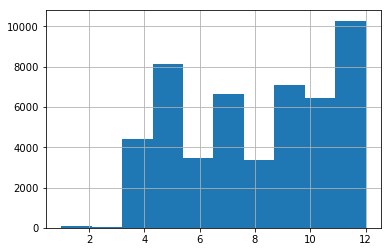

In [14]:
up_time= pd.DataFrame(columns=['year', 'month','date'])
up_time['date']=data['created_at']

up_months = pd.to_datetime(data['created_at'],format='%y-%M-%d %H:%M %p').apply(lambda x: x.month)
up_time['month']=up_months

up_year = pd.to_datetime(data['created_at'],format='%y-%M-%d %H:%M %p').apply(lambda x: x.year)
up_time['year']=up_year

up_months.hist()

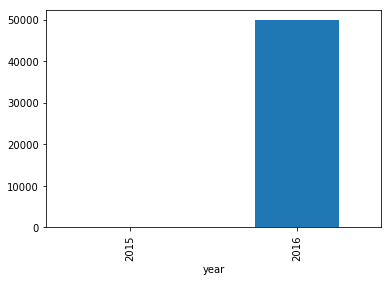

In [15]:
up_time.groupby('year')['date'].count().plot.bar()

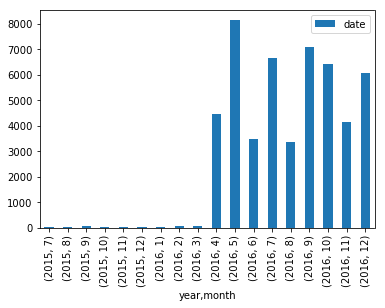

In [16]:
up_time.groupby(['year','month']).count().plot.bar()

## Number of characters

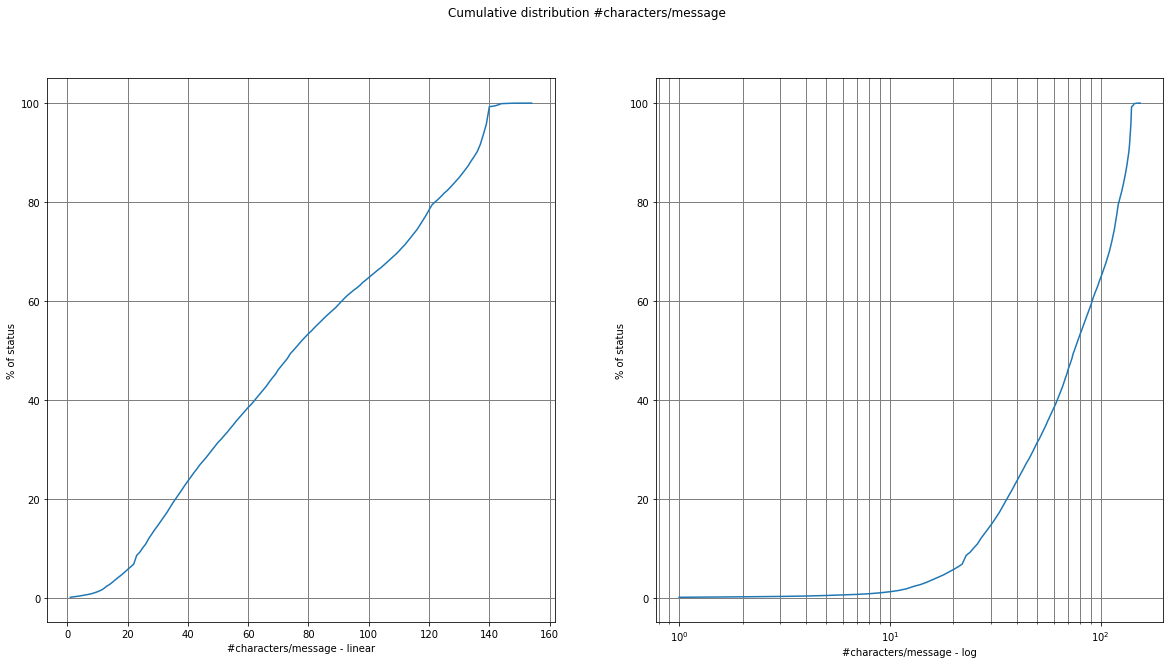

In [18]:
nb_characters = pd.DataFrame(data['text'].apply(lambda x : len(x)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.suptitle('Cumulative distribution #characters/message')

ax1.plot(nb_characters.sort_values(by='text').reset_index().groupby('text').count().cumsum()*100/nb_characters.size)
ax1.set_xlabel('#characters/message - linear')
ax1.set_ylabel('% of status')
ax1.grid(color='grey', linestyle='-', linewidth=1, axis='both', which='both')

ax2.plot(nb_characters.sort_values(by='text').reset_index().groupby('text').count().cumsum()*100/nb_characters.size)
ax2.set_xscale('log')
ax2.set_xlabel('#characters/message - log')
ax2.set_ylabel('% of status')
ax2.grid(color='grey', linestyle='-', linewidth=1, axis='both', which='both')